In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("US_Accidents_May19.csv")
df2 = df[["Severity","Start_Time","End_Time","Start_Lat","Start_Lng","Zipcode","State","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)", "Wind_Speed(mph)","Precipitation(in)","Weather_Condition","Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]]
df2 = df2.fillna(0)

In [3]:
df2["Start_Time"] = pd.to_datetime(df2["Start_Time"]) # change to datime format
df2["End_Time"] = pd.to_datetime(df2["End_Time"])

In [4]:
df2["Start_Time_Year"] = pd.DatetimeIndex(df2["Start_Time"]).year
df2["Start_Time_Month"] = pd.DatetimeIndex(df2["Start_Time"]).month
df2["Start_Time_Day"] = pd.DatetimeIndex(df2["Start_Time"]).day
df2["Start_Time_Hour"] = pd.DatetimeIndex(df2["Start_Time"]).hour
df2["Start_Time_Minute"] = pd.DatetimeIndex(df2["Start_Time"]).minute
df2["End_Time_Year"] = pd.DatetimeIndex(df2["End_Time"]).year
df2["End_Time_Month"] = pd.DatetimeIndex(df2["End_Time"]).month
df2["End_Time_Day"] = pd.DatetimeIndex(df2["End_Time"]).day
df2["End_Time_Hour"] = pd.DatetimeIndex(df2["End_Time"]).hour
df2["End_Time_Minute"] = pd.DatetimeIndex(df2["End_Time"]).minute

In [5]:
df2 = df2.drop(['Start_Time', 'End_Time'], axis=1)

In [6]:
df2.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Zipcode               object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Start_Time_Year        int64
Start_Time_Month       int64
Start_Time_Day         int64
Start_Time_Hour        int64
Start_Time_Minute      int64
End_Time_Year          int64
End_Time_Month         int64
End_Time_Day           int64
End_Time_Hour 

In [7]:
# 
df2["Amenity"] = df2["Amenity"].astype('int64', copy=False) # change true->1 false->0
df2["Bump"] = df2["Bump"].astype('int64', copy=False)
df2["Crossing"] = df2["Crossing"].astype('int64', copy=False)
df2["Give_Way"] = df2["Give_Way"].astype('int64', copy=False)
df2["Junction"] = df2["Junction"].astype('int64', copy=False)
df2["No_Exit"] = df2["No_Exit"].astype('int64', copy=False)
df2["Railway"] = df2["Railway"].astype('int64', copy=False)
df2["Roundabout"] = df2["Roundabout"].astype('int64', copy=False)
df2["Station"] = df2["Station"].astype('int64', copy=False)
df2["Stop"] = df2["Stop"].astype('int64', copy=False)
df2["Traffic_Calming"] = df2["Traffic_Calming"].astype('int64', copy=False)
df2["Traffic_Signal"] = df2["Traffic_Signal"].astype('int64', copy=False)
df2["Turning_Loop"] = df2["Turning_Loop"].astype('int64', copy=False)

In [8]:
# df2 = df2.dropna(subset=['Zipcode'])
df['Zipcode'] = df['Zipcode'].fillna(0) #fill NAN with 0
df2["Zipcode"] = df2["Zipcode"].str.replace('-','').astype('float64', copy=False)
# df2['Zipcode'] = pd.to_numeric(df2['Zipcode'], errors='coerce')


In [9]:
us_state_abbrev = {
    'AL':1,
    'AK':2,
    'AZ':3,
    'AR':4,
    'CA':5,
    'CO':6,
    'CT':7,
    'DE':8,
    'FL':9,
    'GA':10,
    'HI':11,
    'ID':12,
    'IL':13,
    'IN':14,
    'IA':15,
    'KS':16,
    'KY':17,
    'LA':18,
    'ME':19,
    'MD':20,
    'MA':21,
    'MI':22,
    'MN':23,
    'MS':24,
    'MO':25,
    'MT':26,
    'NE':27,
    'NV':28,
    'NH':29,
    'NJ':30,
    'NM':31,
    'NY':32,
    'NC':33,
    'ND':34,
    'OH':35,
    'OK':36,
    'OR':37,
    'PA':38,
    'RI':39,
    'SC':40,
    'SD':41,
    'TN':42,
    'TX':43,
    'UT':44,
    'VT':45,
    'VA':46,
    'WA':47,
    'WV':48,
    'WI':49,
    'WY':50,
}


In [10]:
df2['State'] = df['State'].fillna(0) #fill NAN with 0
df2['State'] = df2['State'].map(us_state_abbrev)

In [11]:
weather_map = {
    'Light Rain':1,
    'Overcast':2,
    'Mostly Cloudy':3,
    'Rain':4,
    'Light Snow':5,
    'Haze':6,
    'Scattered Clouds':7,
    'Partly Cloudy':8,
    'Clear':9,
    'Snow':10,
    'Light Freezing Drizzle':11,
    'Light Drizzle':12,
    'Fog':13,
    'Shallow Fog':14,
    'Heavy Rain':15,
    'Light Freezing Rain':16,
    'Drizzle':17,
    'Light Rain Showers':18
}

In [12]:
df2['Weather_Condition'] = df['Weather_Condition'].fillna(0) #fill NAN with 0
df2['Weather_Condition'] = df2['Weather_Condition'].map(weather_map)

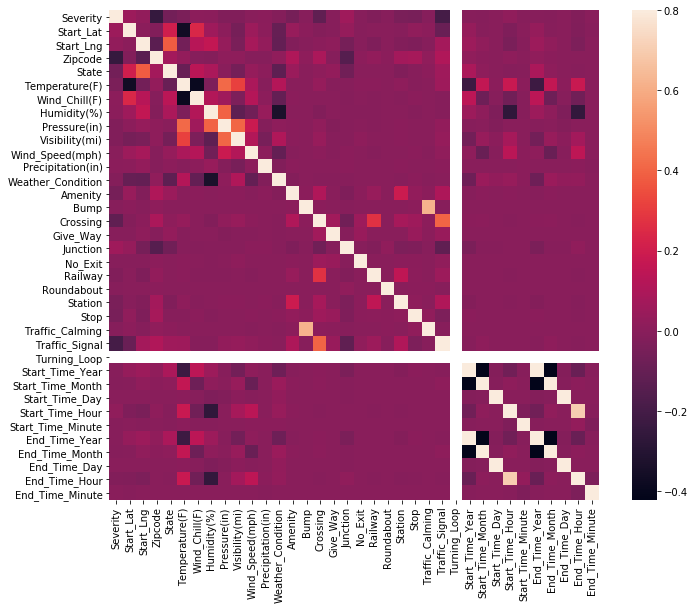

In [13]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.savefig("figures/data-heatmap.png")
plt.show()

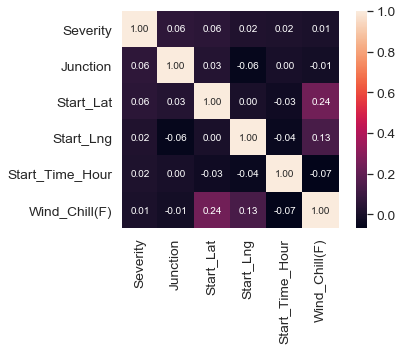

In [16]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Severity')['Severity'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig("figures/data-severity-heatmap.png")
plt.show()

In [15]:
df2 = df2.dropna()
df2.to_csv('preprocessed-file.csv', index=False)